 * https://www.kaggle.com/ivanegapratama/covid-eda-initial-exploration-tool
 * https://www.kaggle.com/jonathanbesomi/cord-19-sources-unification-with-pyspark-sql

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import glob
import json

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StringType

In [7]:
spark = SparkSession.builder.appName("HW3-data-exploration").getOrCreate()

In [8]:
root_path = '../data/archive/'
metadata_path = f'{root_path}/metadata.csv'
print(metadata_path)

../data/archive//metadata.csv


In [50]:
meta_df = spark.read.option("header",True).csv(metadata_path)
meta_df.limit(10).toPandas()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,None,None,None,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,None
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,None,None,None,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,None
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,None,None,None,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,None
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,None,None,None,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,None
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,None,None,None,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,None
5,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,None,None,None,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...,None
6,5yhe786e,3bb07ea10432f7738413dff9816809cc90f03f99,PMC,Debate: Transfusing to normal haemoglobin leve...,10.1186/cc987,PMC137267,11299062,no-cc,Recent evidence suggests that critically ill p...,2001-03-08,"Alvarez, Gonzalo; Hébert, Paul C; Szick, Sharyn",Crit Care,None,None,None,document_parses/pdf_json/3bb07ea10432f7738413d...,document_parses/pmc_json/PMC137267.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,None
7,8zchiykl,5806726a24dc91de3954001effbdffd7a82d54e2,PMC,The 21st International Symposium on Intensive ...,10.1186/cc1013,PMC137274,11353930,no-cc,The 21st International Symposium on Intensive ...,2001-05-02,"Ball, Jonathan; Venn, Richard",Crit Care,None,None,None,document_parses/pdf_json/5806726a24dc91de39540...,document_parses/pmc_json/PMC137274.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,None
8,8qnrcgnk,faaf1022ccfe93b032c5608097a53543ba24aedb,PMC,Heme oxygenase-1 and carbon monoxide in pulmon...,10.1186/1465-9921-4-7,PMC193681,12964953,no-cc,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-08-07,"Slebos, Dirk-Jan; Ryter, Stefan W; Choi, Augus...",Respir Res,None,None,None,document_parses/pdf_json/faaf1022ccfe93b032c56...,document_parses/pmc_json/PMC193681.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1..

In [51]:
print("There are ", meta_df.count(), " sources in the metadata file.")

There are  315948  sources in the metadata file.


In [52]:
meta_df.printSchema()

root
 |-- cord_uid: string (nullable = true)
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubmed_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- mag_id: string (nullable = true)
 |-- who_covidence_id: string (nullable = true)
 |-- arxiv_id: string (nullable = true)
 |-- pdf_json_files: string (nullable = true)
 |-- pmc_json_files: string (nullable = true)
 |-- url: string (nullable = true)
 |-- s2_id: string (nullable = true)



Get all of the JSON files

In [10]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
print("There are ", len(all_json), "sources files.")

There are  219713 sources files.


In [12]:
#todo - for now restrict this to 100 files
all_json = all_json[:100]

In [13]:
data = spark.read.json(all_json, multiLine=True)
data.createOrReplaceTempView("data")

In [14]:
data.limit(10).toPandas()

,back_matter,bib_entries,body_text,metadata,paper_id,ref_entries
0,[],"(([Row(first='KL', last='Banks', middle=[], su...","[([], [], Age and Breed ::: HISTORY ::: Diagno...","([(None, Dorothy, Ainsworth, ['M.'], ), (None,...",PMC7173479,((BOX 7-2: GRADING SCHEME FOR LYMPHOID HYPERPL...
1,[],"(([Row(first='R.K.', last='Abbott', middle=[],...","[([Row(end=410, mention='Beeler and van Wyke C...","([(None, Tara, Bancroft, [], ), (None, Blair, ...",PMC6780997,((Figure 1.: Identification and characterizati...
2,[],"(([Row(first='PJ', last='Barnes', middle=[], s...","[([], [], Casuïstiek ::: Inleiding, \n\nErnst...","([(None, C.D.A., Stehouwer, [], ), (None, R-P....",PMC7121426,"(None, None, None, None, None, None, None, Non..."
3,[],"(([Row(first='R.J.', last='Lefkowitz', middle=...","[([Row(end=15, mention='33', ref_id='BIBREF32'...","([(None, Einar, Krogsaeter, ['K.'], ), (None, ...",PMC7111325,((Fig. 1: CluePedia visualisation of proteins ...
4,[],"(([Row(first='F', last='Gao', middle=[], suffi...","[([Row(end=596, mention='9', ref_id='BIBREF180...","([(None, Edward, Janoff, ['N.'], ), (None, Phi...",PMC7094406,((Fig. 1: HIV-1 entry in the gastrointestinal ...
5,[],"(([Row(first='MB', last='Powell', middle=[], s...","[([Row(end=162, mention='1948', ref_id='BIBREF...","([(None, Abel, Lajtha, [], ), (None, Armen, Ga...",PMC7121640,"(None, None, None, None, None, None, None, Non..."
6,[],"(([Row(first='Z', last='Bai', middle=[], suffi...","[([Row(end=848, mention='1', ref_id='BIBREF0',...","([(None, Xiaolin, Fan, [], ), (None, Lei, Wang...",PMC7100848,((Figure 1: \nTime series of\n\documentclass[1...
7,[],"(([Row(first='J.F.', last='Cooley', middle=[],...","[([Row(end=156, mention='[1]', ref_id='BIBREF0...","([(None, Sara, Giannitelli, ['M.'], ), (None, ...",PMC7152487,((Figure 8.1: Number of publications on hybrid...
8,[],"(([Row(first='T.', last='Uchiyama', middle=[],...","[([Row(end=282, mention='1', ref_id='BIBREF0',...","([(None, Tiejun, Zhao, [], ), (None, Louis, Ma...",PMC4776189,((Figure 1: Regulatory and accessory genes enc...
9,[],"(([Row(first='A', last='Castello', middle=[], ...","[([Row(end=72, mention='1', ref_id='BIBREF0', ...","([(None, Nila, Choudhury, ['Roy'], ), (None, G...",PMC5678581,((Fig. 1: TRIM25 is a bona fide RNA-binding pr...


In [17]:
# Select text columns
covid_sql = spark.sql(
        """
        SELECT
            metadata.title AS title,
            body_text.text AS body_text,
            paper_id
        FROM data
        """)

In [18]:
covid_sql.limit(10).toPandas()

,title,body_text,paper_id
0,Disorders of the Respiratory System,[The age and breed of the animal exhibiting re...,PMC7173479
1,Detection and activation of HIV broadly neutra...,"[There are many pathogens, such as HIV-1, resp...",PMC6780997
2,16 Longziekten,[\n\nErnstige en soms fatale gevolgen van hoog...,PMC7121426
3,The protein interaction networks of mucolipins...,"[Cang et al. [33] found, in an effort to locat...",PMC7111325
4,Emerging concepts in gastrointestinal aspects ...,[New information on the infectiousness of HIV-...,PMC7094406
5,Autoimmune Processes in the Central Nervous Sy...,[The central nervous system (CNS) has been con...,PMC7121640
6,Global dynamics for a class of discrete SEIRS ...,"[As is well known, many infectious diseases po...",PMC7100848
7,Electrospinning and microfluidics,[The origin of electrospinning (ES) as a viabl...,PMC7152487
8,The Role of HBZ in HTLV-1-Induced Oncogenesis,[Human T-cell leukemia virus type 1 (HTLV-1) i...,PMC4776189
9,RNA-binding activity of TRIM25 is mediated by ...,[More than 300 novel RNA-binding proteins have...,PMC5678581


In [19]:
covid_sql.printSchema()

root
 |-- title: string (nullable = true)
 |-- body_text: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- paper_id: string (nullable = true)



Now that we have the following:
  * title,
  * abstract,
  * body text,
  * back_matter

Join all of them

We definitely need to keep:
  * paper_id (as an index)
  * abstract
  * body text
  

Adding the Word Count Column

In [22]:
word_join_f = F.udf(lambda x: [''.join(w) for w in x], StringType())

In [23]:
# covid_sql = covid_sql.withColumn("abstract", word_join_f("abstract"))
covid_sql = covid_sql.withColumn("body_text", word_join_f("body_text"))

In [25]:
# see https://stackoverflow.com/questions/48927271/count-number-of-words-in-a-spark-dataframe
# df_with_wc = covid_sql.withColumn('wordCount_abstract', F.size(F.split(F.col('abstract'), ' ')))
df_with_wc = covid_sql.withColumn('wordCount_body_text', F.size(F.split(F.col('body_text'), ' ')))

df_with_wc.limit(10).toPandas()

,title,body_text,paper_id,wordCount_body_text
0,Disorders of the Respiratory System,[The age and breed of the animal exhibiting re...,PMC7173479,35361
1,Detection and activation of HIV broadly neutra...,"[There are many pathogens, such as HIV-1, resp...",PMC6780997,8370
2,16 Longziekten,[\n\nErnstige en soms fatale gevolgen van hoog...,PMC7121426,26694
3,The protein interaction networks of mucolipins...,"[Cang et al. [33] found, in an effort to locat...",PMC7111325,4533
4,Emerging concepts in gastrointestinal aspects ...,[New information on the infectiousness of HIV-...,PMC7094406,5805
5,Autoimmune Processes in the Central Nervous Sy...,[The central nervous system (CNS) has been con...,PMC7121640,7122
6,Global dynamics for a class of discrete SEIRS ...,"[As is well known, many infectious diseases po...",PMC7100848,5350
7,Electrospinning and microfluidics,[The origin of electrospinning (ES) as a viabl...,PMC7152487,3514
8,The Role of HBZ in HTLV-1-Induced Oncogenesis,[Human T-cell leukemia virus type 1 (HTLV-1) i...,PMC4776189,3326
9,RNA-binding activity of TRIM25 is mediated by ...,[More than 300 novel RNA-binding proteins have...,PMC5678581,6931


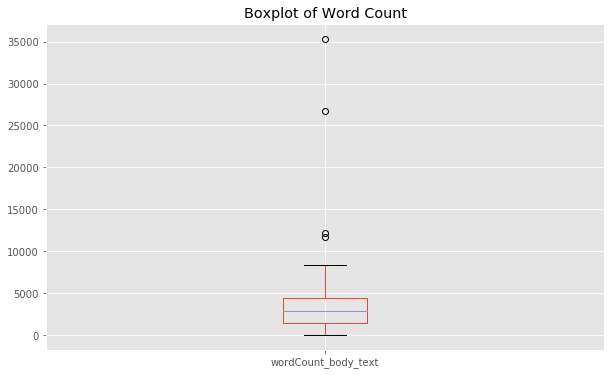

In [32]:
df_with_wc.limit(100).toPandas()[['wordCount_body_text']] \
        .plot(kind='box',
              title='Boxplot of Word Count',
              figsize=(10, 6))
plt.show()